In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# The Game of Frogger

## The game of Frogger is a simple game where a frog starts at one side of a stream and tries to get to the other side of the stream. The stream has within it N lily pads. The frog starts, effectively, on pad 0 and can jump to pad 1, 2, 3, ..., N+1. The frog is equally likely to jump to any of the pads 1, 2, 3, ..., N+1.  The frog gets to the other side when she reaches pad N+1.

## The question is, on average, how many jumps does it take for the frog to get to the other side of the stream?


## Analytic Solution

### The expectation value for a discrete random variable is defined as:

### $E = \sum_{i=0}^{n} x_i p_i$

### where $x_i$ is the value of the random variable and $p_i$ is the probability of the random variable taking on the value $x_i$.

### Let's consider some simple cases:

### n = 0

### $E_0 = x_0 p_0 = 1 \cdot 1 = 1$

### n = 1

### $E_1 = \frac{1}{2} (1) + \frac{1}{2} (2) = 1 + \frac{1}{2} (1) = \frac{3}{2}$ = 1.5

### n = 2

### $E_2 = \frac{1}{3} (1) + \frac{1}{3} (\frac{1}{2} (2) + \frac{1}{2} (3)) + \frac{1}{3} (2)  = 1 + \frac{1}{3} (\frac{3}{2}) + \frac{1}{3} (1) = \frac{11}{6} = 1.8333$

### We can observe a pattern now ... for each value of $n$, we can break down the problem into a sum of the previous problems (for smaller n values).  We see that for any value of n, the expectation value is:

### $E_n = 1 + \frac{1}{n+1} \sum_{i=1}^{n} E_{n-i}$

### So, we can calculate the expectation value for any value of n by calculating the expectation value for all smaller values of n.  A recursive solution to this problem seems appropriate.

## Harmonic Mean

### The harmonic mean is defined as:

### $H = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}$

### where $x_i$ is the value of the random variable and $n$ is the number of values of $x_i$.

### The harmonic mean is the appropriate mean to use when the values of the random variable are rates (e.g. miles per gallon).  In this case, the values of the random variable are the number of jumps it takes for the frog to get to the other side of the stream.  So, the harmonic mean is the appropriate mean to use.



### Set the number of lilypads

In [75]:
n = 100

### seed the random number generator

In [76]:
random.seed(1)

In [77]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value

In [78]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval.append(1)
    else:
        sum = 1.0
        for i in range(0,npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum = sum + 1.0/(npad+1)*(eval[npad-i-1])
        eval.append(sum)
    #print("Theory: ",npad,eval[npad])
  

In [79]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between 1 and the number of lilypads left to jump
            jump = int(random.uniform(1,(end-current_paddle+1)))
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
  

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.500900
Expectation value for n = 2 is 1.836400
Expectation value for n = 3 is 2.077400
Expectation value for n = 4 is 2.286100
Expectation value for n = 5 is 2.457800
Expectation value for n = 6 is 2.580900
Expectation value for n = 7 is 2.719300
Expectation value for n = 8 is 2.827100
Expectation value for n = 9 is 2.937900
Expectation value for n = 10 is 3.026300
Expectation value for n = 11 is 3.112800
Expectation value for n = 12 is 3.172100
Expectation value for n = 13 is 3.246400
Expectation value for n = 14 is 3.298400
Expectation value for n = 15 is 3.391100
Expectation value for n = 16 is 3.469200
Expectation value for n = 17 is 3.512800
Expectation value for n = 18 is 3.529600
Expectation value for n = 19 is 3.583100
Expectation value for n = 20 is 3.642400
Expectation value for n = 21 is 3.695700
Expectation value for n = 22 is 3.720600
Expectation value for n = 23 is 3.770700
Expectation value for n = 

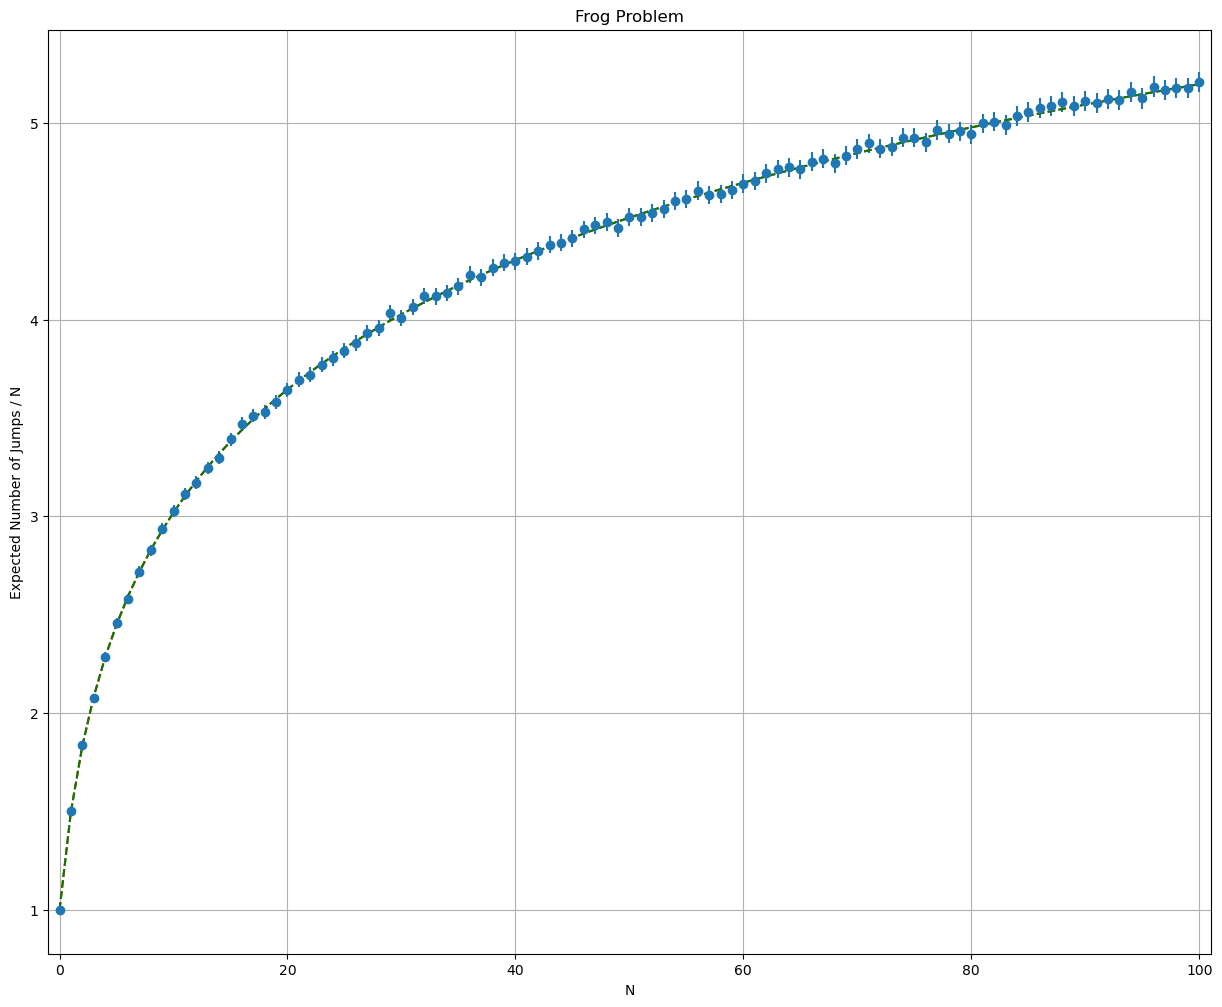

In [80]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,eval,'r--')
ax1.plot(x,eval_harmonic,'g--')


In [81]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value

In [82]:

for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between 1 and the number of lilypads left to jump
            jump = 0
            while jump == 0:
                jump = int(random.uniform((start-current_paddle),(end-current_paddle+1)))
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.498600
Expectation value for n = 2 is 2.343100
Expectation value for n = 3 is 3.238500
Expectation value for n = 4 is 4.185000
Expectation value for n = 5 is 5.252600
Expectation value for n = 6 is 6.168500
Expectation value for n = 7 is 7.190900
Expectation value for n = 8 is 8.152400
Expectation value for n = 9 is 9.222300
Expectation value for n = 10 is 10.023100
Expectation value for n = 11 is 11.165200
Expectation value for n = 12 is 11.990500
Expectation value for n = 13 is 12.965100
Expectation value for n = 14 is 13.968700
Expectation value for n = 15 is 15.228700
Expectation value for n = 16 is 16.228600
Expectation value for n = 17 is 17.474700
Expectation value for n = 18 is 17.849000
Expectation value for n = 19 is 18.989900
Expectation value for n = 20 is 20.193000
Expectation value for n = 21 is 21.036600
Expectation value for n = 22 is 22.131400
Expectation value for n = 23 is 23.028900
Expectation 

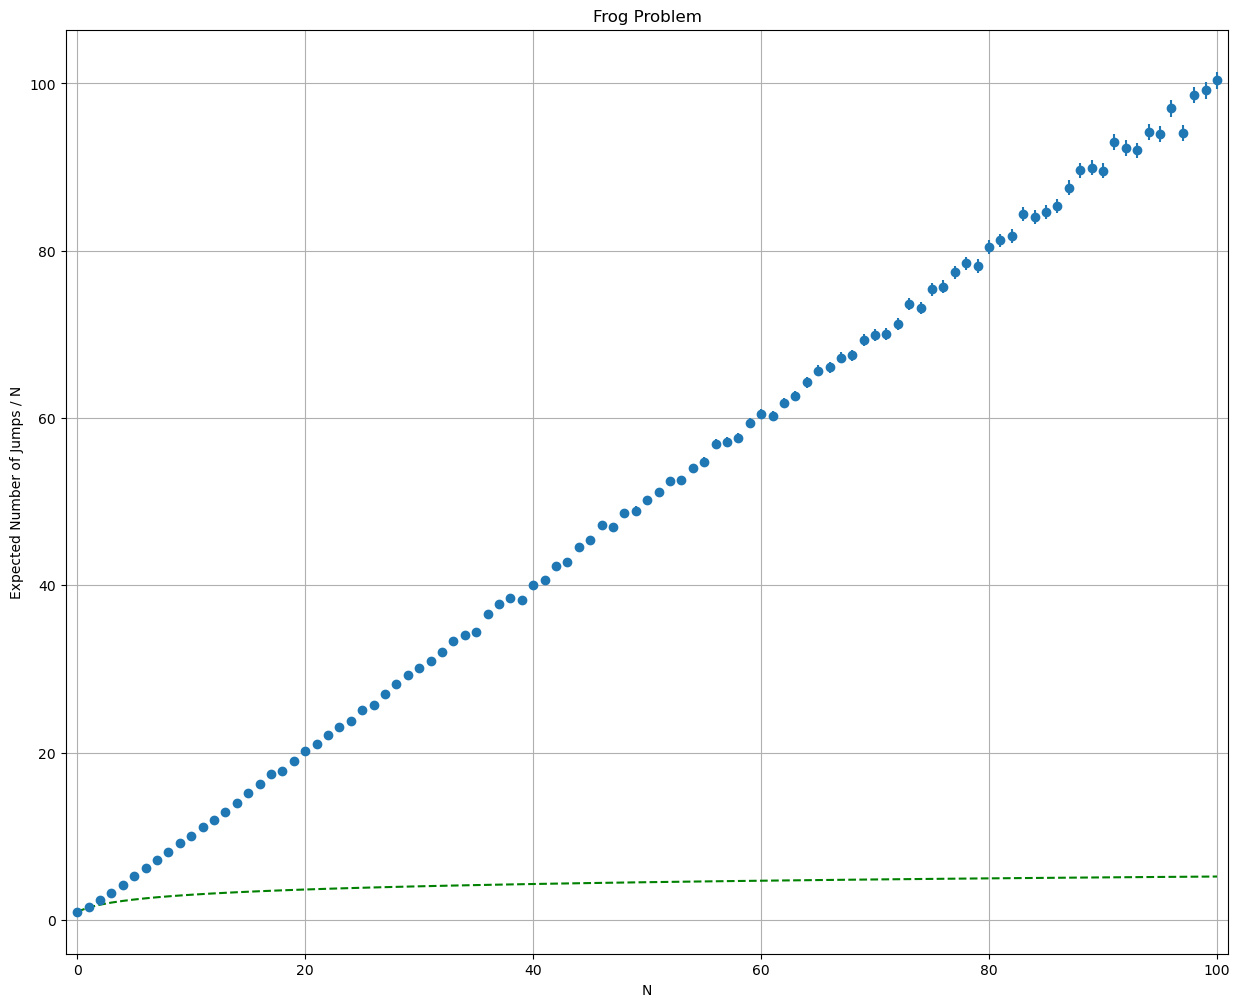

In [83]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,eval_harmonic,'g--')


The result linearly increases with the number of lily pads since at any lily pad there is a 1/n probability of jumping to the end and thus instead of always moving forward you just have to land at the end.

In [84]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value

In [85]:

for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between 1 and the number of lilypads left to jump
            num_lily_left = end-current_paddle + 1
            probs = 1/np.linspace(1, (end-current_paddle+1), (end-current_paddle+1))
            probs = probs / np.sum(probs)
            jump = int(np.random.choice(np.linspace(1, (end-current_paddle+1), (end-current_paddle+1)), p=probs))
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.547900
Expectation value for n = 2 is 1.995300
Expectation value for n = 3 is 2.349600
Expectation value for n = 4 is 2.688700
Expectation value for n = 5 is 2.962500
Expectation value for n = 6 is 3.197200
Expectation value for n = 7 is 3.481300
Expectation value for n = 8 is 3.701400
Expectation value for n = 9 is 3.905500
Expectation value for n = 10 is 4.109800
Expectation value for n = 11 is 4.282300
Expectation value for n = 12 is 4.418700
Expectation value for n = 13 is 4.619700
Expectation value for n = 14 is 4.770000
Expectation value for n = 15 is 4.885400
Expectation value for n = 16 is 5.042400
Expectation value for n = 17 is 5.182400
Expectation value for n = 18 is 5.358500
Expectation value for n = 19 is 5.462300
Expectation value for n = 20 is 5.617000
Expectation value for n = 21 is 5.734800
Expectation value for n = 22 is 5.807200
Expectation value for n = 23 is 5.930400
Expectation value for n = 

101
101


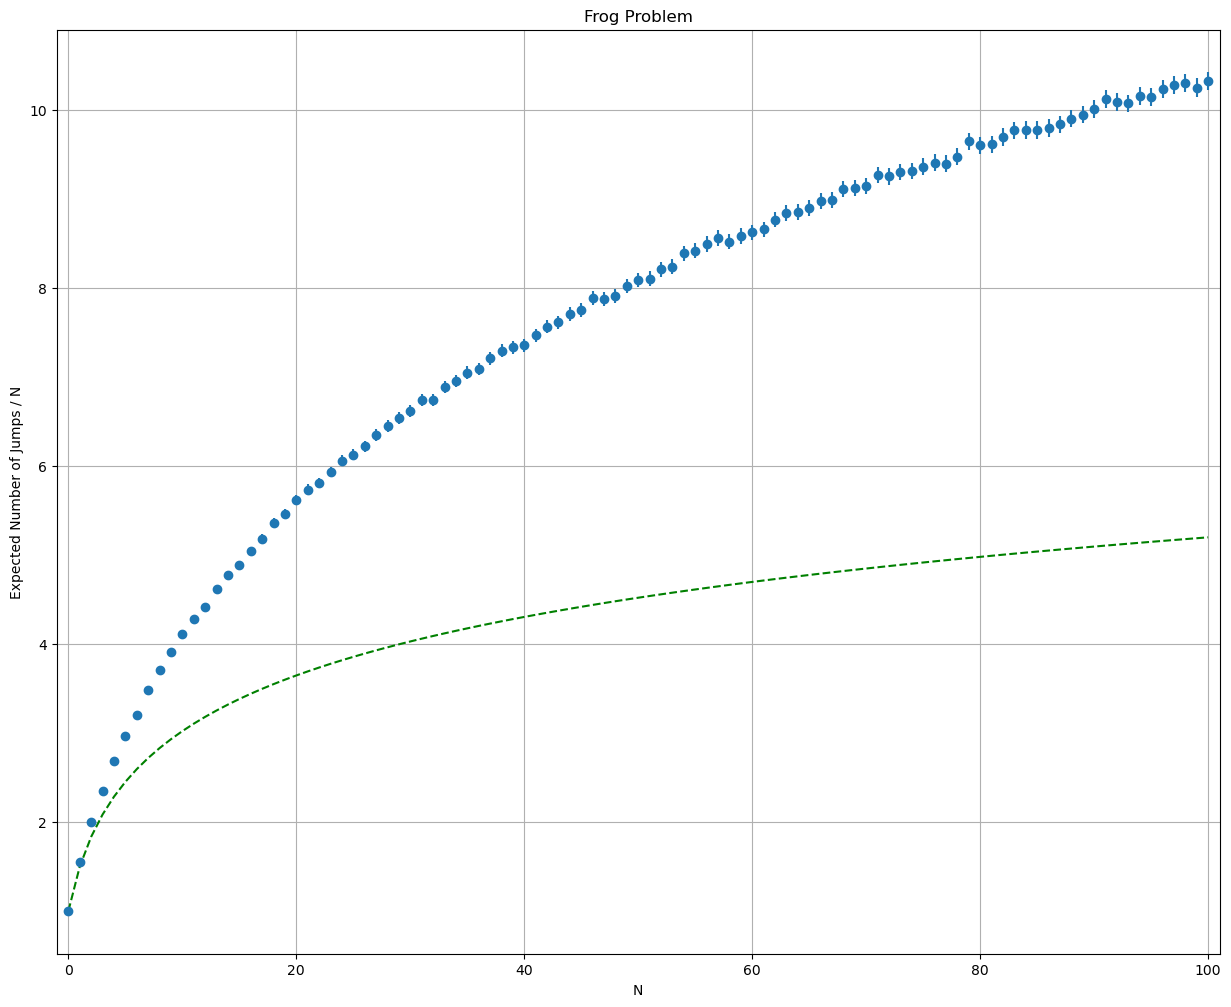

In [87]:
# plot the results

print(len(x))
print(len(y))

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,eval_harmonic,'g--')


It makes sense that this would take longer than the equal probability case since this one prefers short jumps.